# Import Libraries

### Pandas
### Seaborn
### Numpy
### Matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Read File

In [2]:
dataset = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Multiple Linear Regression\multiple_linear_regression_data.csv")
dataset

,experience,age,education_level,city_tier,salary
0,1,22,1,3,25000
1,2,25,2,2,35000
2,3,28,2,2,45000
3,4,30,3,1,55000
4,5,32,3,1,60000
5,6,35,3,1,70000
6,7,36,3,2,72000
7,8,38,3,2,75000
8,9,40,3,1,80000
9,10,45,3,1,85000


### check Rows And Columns

In [3]:
dataset.shape

(10, 5)

### Check Coo-Relation 

In [4]:
dataset.corr()


,experience,age,education_level,city_tier,salary
experience,1.000000,0.992891,0.787296,-0.577350,0.978893
age,0.992891,1.000000,0.794761,-0.619645,0.978686
education_level,0.787296,0.794761,1.000000,-0.818182,0.881147
city_tier,-0.577350,-0.619645,-0.818182,1.000000,-0.669608
salary,0.978893,0.978686,0.881147,-0.669608,1.000000


### Check Null Value

In [5]:
dataset.isnull().sum

<bound method DataFrame.sum of    experience    age  education_level  city_tier  salary
0       False  False            False      False   False
1       False  False            False      False   False
2       False  False            False      False   False
3       False  False            False      False   False
4       False  False            False      False   False
5       False  False            False      False   False
6       False  False            False      False   False
7       False  False            False      False   False
8       False  False            False      False   False
9       False  False            False      False   False>

### Check The Data Set 

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   experience       10 non-null     int64
 1   age              10 non-null     int64
 2   education_level  10 non-null     int64
 3   city_tier        10 non-null     int64
 4   salary           10 non-null     int64
dtypes: int64(5)
memory usage: 528.0 bytes


### A pair plot is used to visualize the relationships between multiple variables in a dataset in graphical form.

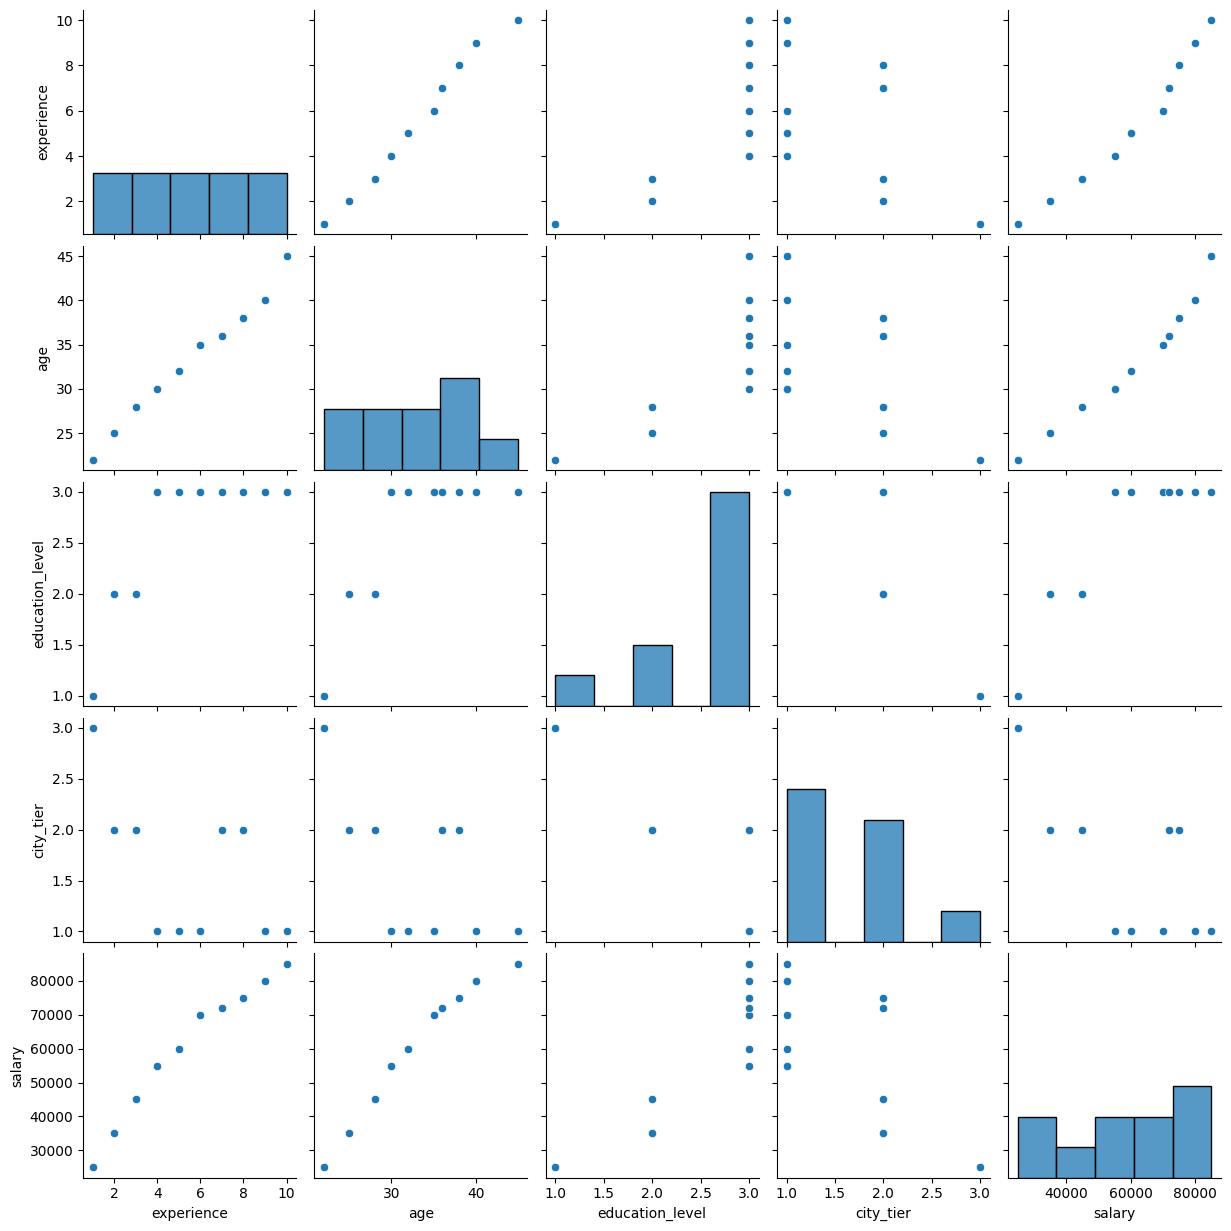

In [7]:
sns.pairplot(data=dataset)
plt.show()

### Distribute The Variable in X and Y

In [8]:
x=dataset[["experience", "age", "education_level", "city_tier"]]
y=dataset["salary"]

### Import Model Selection From Sklearn To split the data in train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.4, random_state=42)


### Select The Model Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression



### Apply The Model

In [12]:

lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Check the score (accuacry) for the performace of our model & check the overfitting of Model ( No Overfit )

In [14]:
lr.score(x_test,y_test)*100 , lr.score(x_train,y_train)*100

(97.04705882352944, 99.90683229813665)

### Prediction

In [15]:
dataset["Prediction"]=lr.predict(x)
dataset

,experience,age,education_level,city_tier,salary,Prediction
0,1,22,1,3,25000,26833.333333
1,2,25,2,2,35000,39166.666667
2,3,28,2,2,45000,45000.000000
3,4,30,3,1,55000,55500.000000
4,5,32,3,1,60000,59500.000000
5,6,35,3,1,70000,65333.333333
6,7,36,3,2,72000,71500.000000
7,8,38,3,2,75000,75500.000000
8,9,40,3,1,80000,75500.000000
9,10,45,3,1,85000,85000.000000


### Whole Data Set Prediction Graph

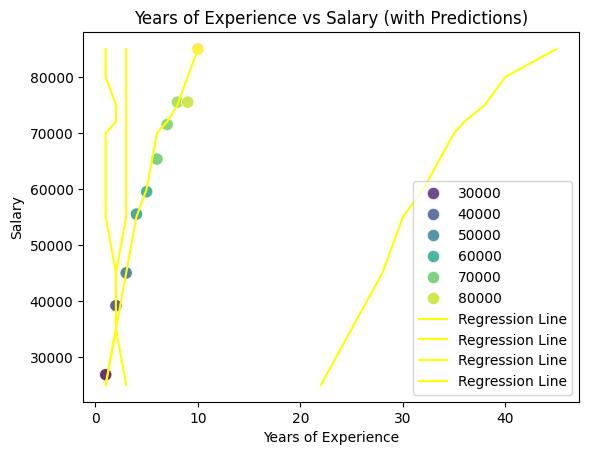

In [16]:
sns.scatterplot(x="experience", y="Prediction", data=dataset, hue="salary", palette="viridis", s=80, alpha=0.8)
plt.plot(x,y,label="Regression Line",color="yellow")
plt.title("Years of Experience vs Salary (with Predictions)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()
plt.show()

### Trend Between Experience and Salary & Prediction

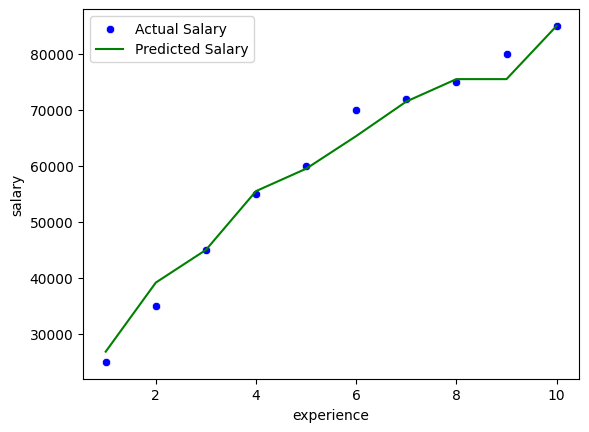

In [17]:
sns.scatterplot(x=dataset["experience"], y=dataset["salary"], color="blue", label="Actual Salary")
sns.lineplot(x=dataset["experience"], y=dataset["Prediction"], color="green", label="Predicted Salary")
plt.show()


### Trend Between Age and Salary & Prediction

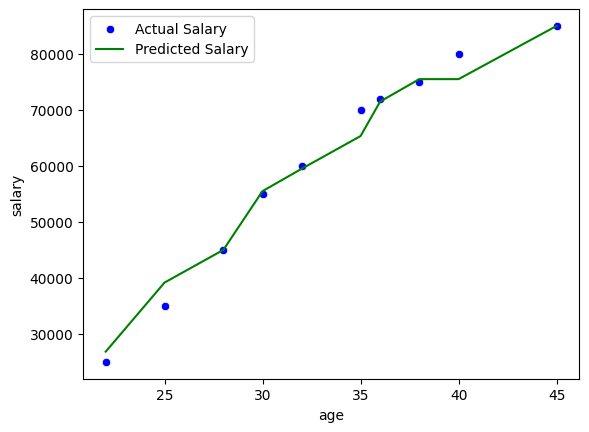

In [18]:
sns.scatterplot(x=dataset["age"], y=dataset["salary"], color="blue", label="Actual Salary")
sns.lineplot(x=dataset["age"], y=dataset["Prediction"], color="green", label="Predicted Salary")
plt.show()


### Trend Between Education_level and Salary & Prediction

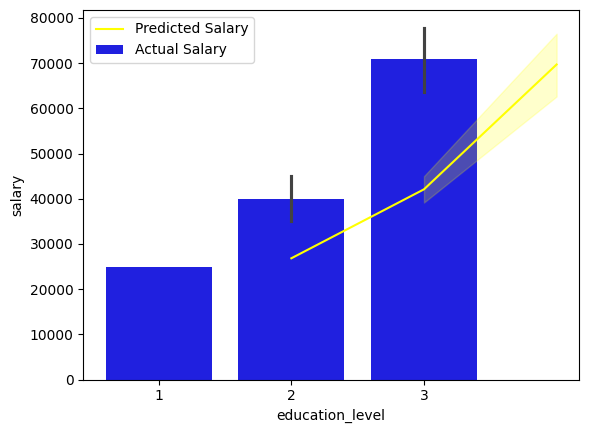

In [19]:
sns.barplot(x=dataset["education_level"], y=dataset["salary"], color="blue", label="Actual Salary")
sns.lineplot(x=dataset["education_level"], y=dataset["Prediction"], color="yellow", label="Predicted Salary")
plt.show()


### Import Again library for check the Matrics

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check The Metrics 

In [22]:
mae = mean_absolute_error(dataset["salary"], dataset["Prediction"]) 
mse = mean_squared_error(dataset["salary"], dataset["Prediction"])
rmse = np.sqrt(mse)
r2 = r2_score(dataset["salary"], dataset["Prediction"])


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1716.6666666666629
Mean Squared Error (MSE): 6374999.999999976
Root Mean Squared Error (RMSE): 2524.8762345905147
R² Score: 0.9822601291184329


### 📌 Conclusion

In this project, we successfully implemented **Multiple Linear Regression** using **Scikit-learn**. The model was trained on a synthetic dataset predicting salary based on education level and experience. The performance metrics — including a high R² Score of **0.98** — indicate that the model fits the data very well.

We also visualized actual vs predicted values to better understand how the model performs.

✅ This notebook is a great starting point for understanding regression modeling using real-world machine learning tools like **Scikit-learn**.

Next Steps:
- Try using real-world datasets (e.g., from Kaggle or UCI)
- Add train/test split and cross-validation
- Try polynomial regression for nonlinear relationships
